<a href="https://colab.research.google.com/github/ra1111/Adani-Green-Sentiment-Analysis/blob/main/AdaniSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
combined_data_df = pd.read_csv("CombinedData.csv")
# First, convert the 'Date' column to datetime format
combined_data_df['Date'] = pd.to_datetime(combined_data_df['Date'], errors='coerce')

# Filter out the data for Adani Power, Adani Green, and Adani Port into separate DataFrames
# Make sure that the 'Date' column is in datetime format
combined_data_df['Date'] = pd.to_datetime(combined_data_df['Date'])

# Filter the DataFrame for 'adanipower' keyword and dates in the second half of 2023 and all of 2024
adani_power_df = combined_data_df[
    combined_data_df['Keyword'].str.contains('adanigreen', na=False) &
    ((combined_data_df['Date'].dt.year == 2023) & (combined_data_df['Date'].dt.month >= 11) |
     (combined_data_df['Date'].dt.year == 2024))
]

adani_green_df = combined_data_df[
    combined_data_df['Keyword'].str.contains('adanigreen', na=False) &
    ((combined_data_df['Date'].dt.year == 2023) & (combined_data_df['Date'].dt.month >= 11) |
     (combined_data_df['Date'].dt.year == 2024))
]
adani_port_df = combined_data_df[combined_data_df['Keyword'].str.contains('adaniport', na=False)]
# Drop rows where 'Text' is None
adani_power_df = adani_power_df.dropna(subset=['Text'])

# Check the first few rows of each DataFrame to ensure correctness
adani_green_df.describe()

,Unnamed: 0,Year,Month
count,1019.000000,1019.000000,1019.000000
mean,1186.974485,2023.090285,10.880275
std,716.962136,0.286730,3.131592
min,594.000000,2023.000000,1.000000
25%,849.500000,2023.000000,12.000000
50%,1104.000000,2023.000000,12.000000
75%,1358.500000,2023.000000,12.000000
max,5873.000000,2024.000000,12.000000


In [3]:
pip install deep_translator


In [4]:
pip install vaderSentiment

In [5]:
# This is to translate the text from Hindi to English
from deep_translator import GoogleTranslator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def analyze_sentiment(text):
    # Check if the text is None or not a string
    if text is None or not isinstance(text, str) or not text.strip(',').strip():
        return 'Neutral', 0.0  # Return neutral sentiment for such cases
    # Translate text
    translated_text = GoogleTranslator(source='auto', target='en').translate(text)
    print(translated_text)
    analyzer = SentimentIntensityAnalyzer()
    # Analyze sentiment
    sentiment_dict = analyzer.polarity_scores(translated_text)

    # Determine sentiment type
    if sentiment_dict['compound'] >= 0.05:
        return "Positive", sentiment_dict['compound']
    elif sentiment_dict['compound'] <= -0.05:
        return "Negative", sentiment_dict['compound']
    else:
        return "Neutral", sentiment_dict['compound']

In [6]:
adani_power_df['Sentiment'], adani_power_df['Score'] = zip(*adani_power_df['Text'].apply(analyze_sentiment))

Closing bell #nifty #nifty50 #NiftyBank #niftyoption #adanigreen #cipla #itc #Infosys #finnifty #StocksToBuy
Bumper jump in Adani's earnings after relief from Supreme Court: Beat Ambani to become number one again, know net worth #GautamAdani #AdaniGroup #Networth #Bloomberg #BloombergBillionairesIndex #AdaniPorts #AdaniGroup #adanigreen #gautamadani @gautam_adani @AdaniOnline https://www.vtvgujarati.com/ news-details/adani-group-chairman-gautam-adani-has-once-again-become-indias-richest-man
TRADES ❤️‍🔥 (3rd Jan):  #Nifty put 135+ #Banknifty put 300+ #AdaniGreen put 55+ #YesBank 0.40+ #Reliance put 14+ #LT 25+ #Mcdowell 13+ #Cipla 12+ #Bhel 2.30+ #HAL 16+ #Banknifty #Nifty put (3pm) 45+  #StockMarket #StockMarketIndia
#ADANIGREEN 1692  Aiming for easy 3050.  #Analysis #Tutorial
Adani Ent, Adani Power, Adani Ports, Adani Total Gas: Adani Shares Trading In Green Today (Jan 4, 2024)  #SupremeCourt #StockToWatch #StockMarket #StockMarketNews #StockMarketindia #AdaniGetsCleanChit #AdaniEnter

In [7]:
adani_power_df


,Unnamed: 0,Keyword,Link,Text,Date,Year,Month,Sentiment,Score
594,594,adanigreen,https://twitter.com/mytradelogic/status/174321...,Closing bell #nifty #nifty50 #NiftyBank #nifty...,2024-01-05 10:16:00,2024.0,1.0,Positive,0.4019
595,595,adanigreen,https://twitter.com/Priykantnews/status/174315...,સુપ્રીમ કોર્ટથી રાહત બાદ અદાણીની કમાણીમાં બમ્પ...,2024-01-05 06:03:00,2024.0,1.0,Positive,0.8360
596,596,adanigreen,https://twitter.com/TRADE_TUNE/status/17429846...,TRADES ❤️‍🔥 (3rd Jan): #Nifty put 135+ #Bankn...,2024-01-04 19:01:00,2024.0,1.0,Positive,0.4588
597,597,adanigreen,https://twitter.com/naresh_routhu19/status/174...,#ADANIGREEN 1692 Aiming for easy 3050. #Anal...,2024-01-04 17:13:00,2024.0,1.0,Positive,0.4404
598,598,adanigreen,https://twitter.com/GoodReturnsIN/status/17428...,"Adani Ent, Adani Power, Adani Ports, Adani Tot...",2024-01-04 08:02:00,2024.0,1.0,Positive,0.3535
...,...,...,...,...,...,...,...,...,...
5850,5850,adanigreen,https://i.redd.it/mst71kwik73c1.jpeg,Adani to the moon 🚀.. Adanji wapas 4000 pohcha do,2023-11-29 03:43:48,2023.0,11.0,Neutral,0.0000
5858,5858,adanigreen,https://i.redd.it/qd80n8loj6ac1.png,Finally paid off.,2024-01-03 07:48:41,2024.0,1.0,Neutral,0.0000
5860,5860,adanigreen,https://www.reddit.com/gallery/18y7zzo,Need Suggestions,2024-01-04 08:11:44,2024.0,1.0,Neutral,0.0000
5870,5870,adanigreen,https://www.reddit.com/r/IndianStockMarket/com...,Advice for my portfolio,2023-12-06 06:28:57,2023.0,12.0,Neutral,0.0000


In [17]:
# Convert the 'Date' column to datetime objects
# Convert the 'Date' column to datetime objects without specifying the format
adani_power_df['Date'] = pd.to_datetime(adani_power_df['Date'])

# Calculate mean sentiment score per day
daily_sentiment_score = adani_power_df.groupby(adani_power_df['Date'].dt.date)['Score'].mean()

tweet_volume_per_day = adani_power_df.groupby(adani_power_df['Date'].dt.normalize()).size()

# Combine sentiment score and tweet volume into a single DataFrame
daily_sentiment = pd.DataFrame({
    'Average Score': daily_sentiment_score,
    'Tweet Volume': tweet_volume_per_day
})

# Rename 'index' to 'Date'
daily_sentiment.rename(columns={'index': 'Date'}, inplace=True)


In [18]:
# Create lagged features for sentiment scores and tweet volumes
for lag in [1, 3, 5]:  # You can choose different lags
    daily_sentiment[f'Average_Score_Lag_{lag}'] = daily_sentiment['Average Score'].shift(lag)
    daily_sentiment[f'Tweet_Volume_Lag_{lag}'] = daily_sentiment['Tweet Volume'].shift(lag)

# Drop NaN values after shifting
daily_sentiment.dropna(inplace=True)
# Create rolling window features
window_sizes = [3, 7, 14]  # Example window sizes

for window in window_sizes:
    daily_sentiment[f'Rolling_Mean_{window}'] = daily_sentiment['Average Score'].rolling(window=window).mean()
    daily_sentiment[f'Rolling_Std_{window}'] = daily_sentiment['Average Score'].rolling(window=window).std()
daily_sentiment['Expanding_Mean'] = daily_sentiment['Average Score'].expanding().mean()
daily_sentiment['Expanding_Std'] = daily_sentiment['Average Score'].expanding().std()
daily_sentiment['Score_Daily_Change'] = daily_sentiment['Average Score'].diff()
daily_sentiment['Volume_Daily_Change'] = daily_sentiment['Tweet Volume'].diff()
daily_sentiment['Score_Volume_Interaction'] = daily_sentiment['Average Score'] * daily_sentiment['Tweet Volume']


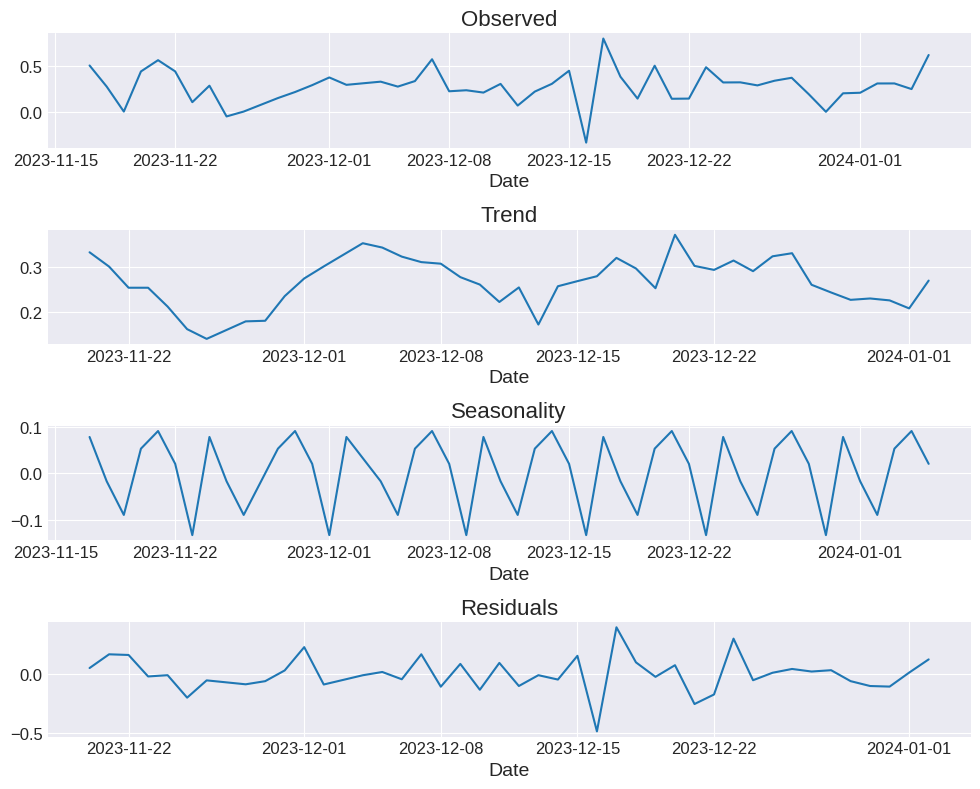

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


# Decompose the time series
decomposition = seasonal_decompose(daily_sentiment['Average Score'], model='additive', period=7)  # adjust the period based on your data

# Plotting the decomposed time series
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decomposition.observed.plot(ax=axes[0], legend=False)
axes[0].set_title('Observed')
decomposition.trend.plot(ax=axes[1], legend=False)
axes[1].set_title('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_title('Seasonality')
decomposition.resid.plot(ax=axes[3], legend=False)
axes[3].set_title('Residuals')
plt.tight_layout()


Observed: This is the actual sentiment score data plotted over time.
Trend: There seems to be a slight downward trend towards the end of November, which then slightly goes up through December.
Seasonality: There is a clear repetitive pattern suggesting weekly seasonality in sentiment scores.
Residuals: These are the residuals after the trend and seasonal components have been removed from the observed data. They show what's left, which can sometimes be random noise or may still contain some information.

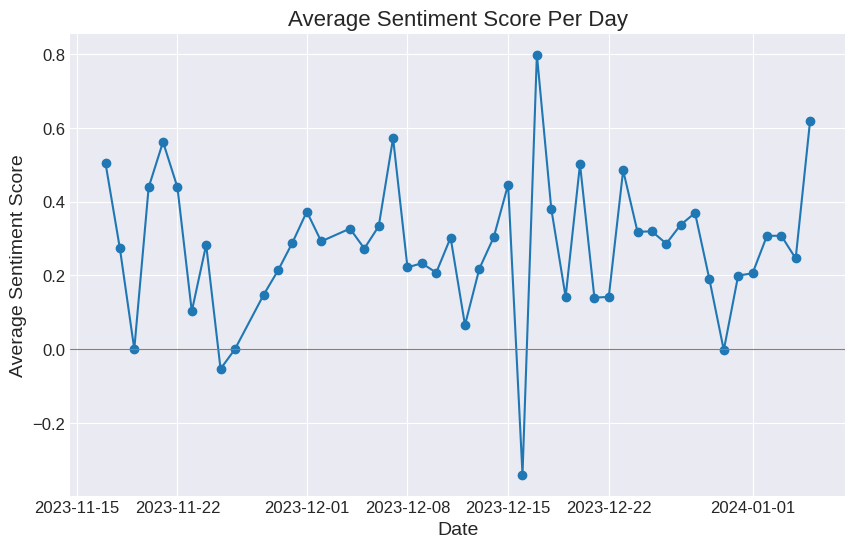

In [20]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_sentiment.index, daily_sentiment['Average Score'], marker='o', linestyle='-')
plt.title('Average Sentiment Score Per Day')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.8)  # Line to indicate neutral sentiment
plt.show()


In [21]:
daily_sentiment

,Average Score,Tweet Volume,Average_Score_Lag_1,Tweet_Volume_Lag_1,Average_Score_Lag_3,Tweet_Volume_Lag_3,Average_Score_Lag_5,Tweet_Volume_Lag_5,Rolling_Mean_3,Rolling_Std_3,Rolling_Mean_7,Rolling_Std_7,Rolling_Mean_14,Rolling_Std_14,Expanding_Mean,Expanding_Std,Score_Daily_Change,Volume_Daily_Change,Score_Volume_Interaction
Date,,,,,,,,,,,,,,,,,,,
2023-11-17,0.504250,4,0.306133,3.0,0.378271,7.0,0.479800,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.504250,NaN,NaN,NaN,2.0170
2023-11-18,0.273200,1,0.504250,4.0,0.458800,1.0,0.120162,8.0,NaN,NaN,NaN,NaN,NaN,NaN,0.388725,0.163377,-0.231050,-3.0,0.2732
2023-11-19,0.000000,1,0.273200,1.0,0.306133,3.0,0.378271,7.0,0.259150,0.252418,NaN,NaN,NaN,NaN,0.259150,0.252418,-0.273200,0.0,0.0000
2023-11-20,0.438850,2,0.000000,1.0,0.504250,4.0,0.458800,1.0,0.237350,0.221611,NaN,NaN,NaN,NaN,0.304075,0.224833,0.438850,1.0,0.8777
2023-11-21,0.562267,3,0.438850,2.0,0.273200,1.0,0.306133,3.0,0.333706,0.295512,NaN,NaN,NaN,NaN,0.355713,0.226373,0.123417,1.0,1.6868
2023-11-22,0.439300,2,0.562267,3.0,0.000000,1.0,0.504250,4.0,0.480139,0.071125,NaN,NaN,NaN,NaN,0.369644,0.205330,-0.122967,-1.0,0.8786
2023-11-23,0.102700,9,0.439300,2.0,0.438850,2.0,0.273200,1.0,0.368089,0.237915,0.331510,0.212870,NaN,NaN,0.331510,0.212870,-0.336600,7.0,0.9243
2023-11-24,0.283200,7,0.102700,9.0,0.562267,3.0,0.000000,1.0,0.275067,0.168447,0.299931,0.198912,NaN,NaN,0.325471,0.197818,0.180500,-2.0,1.9824
2023-11-25,-0.053400,1,0.283200,7.0,0.439300,2.0,0.438850,2.0,0.110833,0.168447,0.253274,0.240238,NaN,NaN,0.283374,0.224030,-0.336600,-6.0,-0.0534


[*********************100%%**********************]  9 of 9 completed


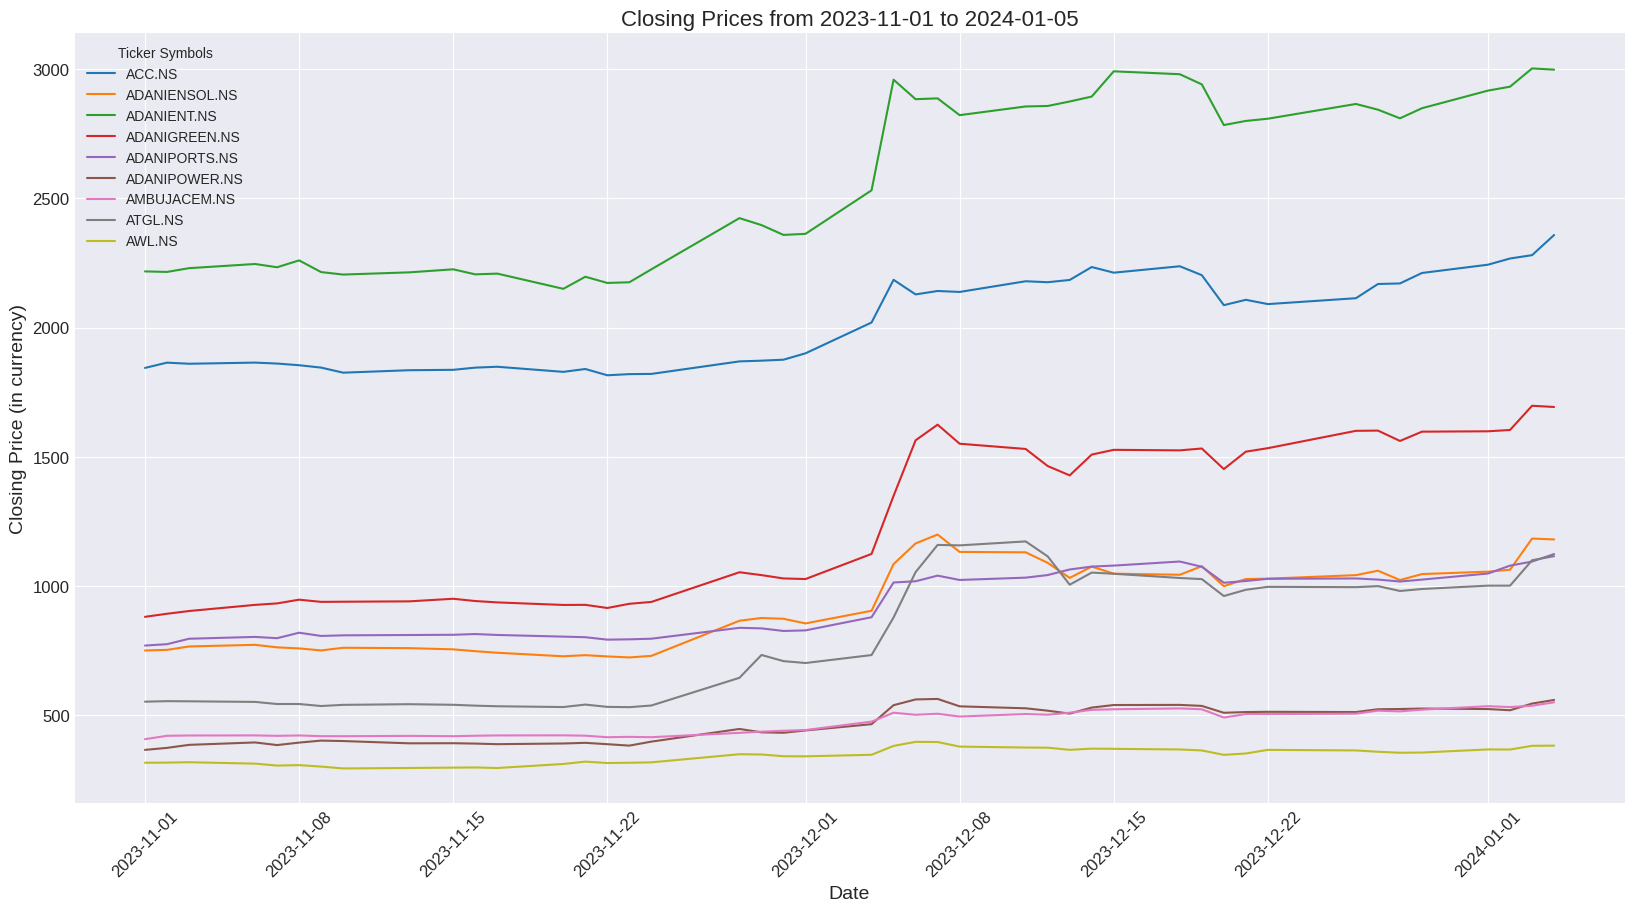

In [13]:
# import modules
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# initialize parameters
start_date = datetime(2023,11, 1)
end_date = datetime(2024, 1, 5)


# get the data
data = yf.download(['ACC.NS','ADANIENT.NS','ADANIGREEN.NS','ADANIENSOL.NS','ADANIPORTS.NS','ADANIPOWER.NS','ATGL.NS','AMBUJACEM.NS','AWL.NS'], start = start_date, end = end_date)



# Import DateFormatter from matplotlib
from matplotlib.dates import DateFormatter

# Set the style and context of the plot for better aesthetics
plt.style.use('seaborn-darkgrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Create the plot with improved aesthetics
plt.figure(figsize=(20, 10))
plt.title('Closing Prices from {} to {}'.format(start_date.date(), end_date.date()))

# Plot each stock's closing prices with a label
for ticker in data['Close'].columns:
    plt.plot(data['Close'][ticker], label=ticker)

# Improve readability and add labels
plt.xlabel('Date')
plt.ylabel('Closing Price (in currency)')
plt.legend(title='Ticker Symbols')  # Add a legend with a title

# Improve the date formatting on the x-axis
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  # Change date format as needed
plt.xticks(rotation=45)  # Rotate the dates for better readability

# Show gridlines
plt.grid(True)

# Show the plot
plt.show()

In [73]:
# Initialize a dictionary to hold each stock's DataFrame
stock_data_dict = {}

# List of tickers and corresponding names
tickers = {
    'ACC.NS': 'ACC',
    'ADANIENT.NS': 'ADANIENT',
    'ADANIGREEN.NS': 'ADANIGREEN',
    'ADANIPOWER.NS':'ADANIPOWER'
    # ... Add more tickers as needed
}

# Loop over each ticker and create a separate DataFrame
for ticker, name in tickers.items():
    temp_data = data.xs(ticker, axis=1, level=1, drop_level=False)
    temp_data.columns = temp_data.columns.get_level_values(0)
    temp_data['Name'] = name
    temp_data['Date']=temp_data.index
    temp_data['Intra_Day_Change'] = temp_data['High'] - temp_data['Low']
    temp_data['Intra_Day_Change_percent'] = (temp_data['Intra_Day_Change'] / temp_data['Low']) * 100
    temp_data['Inter_Day_Change'] = temp_data['Close'] - temp_data['Open']
    temp_data['Inter_Day_Change_percent'] = (temp_data['Inter_Day_Change'] / temp_data['Open']) * 100



    # Store the DataFrame in the dictionary
    stock_data_dict[name] = temp_data

# Now you have a dictionary where you can access each stock's DataFrame by its name
# For example, to access the ACC stock data:
ACC_stock_data = stock_data_dict['ACC']

# To access the ADANIENT stock data:
ADANIENT_stock_data = stock_data_dict['ADANIENT']
ADPOW_stock_data=stock_data_dict['ADANIGREEN']

# And so on for the other stocks...
ADPOW_stock_data['Date']

Date
2023-11-01   2023-11-01
2023-11-02   2023-11-02
2023-11-03   2023-11-03
2023-11-06   2023-11-06
2023-11-07   2023-11-07
2023-11-08   2023-11-08
2023-11-09   2023-11-09
2023-11-10   2023-11-10
2023-11-13   2023-11-13
2023-11-15   2023-11-15
2023-11-16   2023-11-16
2023-11-17   2023-11-17
2023-11-20   2023-11-20
2023-11-21   2023-11-21
2023-11-22   2023-11-22
2023-11-23   2023-11-23
2023-11-24   2023-11-24
2023-11-28   2023-11-28
2023-11-29   2023-11-29
2023-11-30   2023-11-30
2023-12-01   2023-12-01
2023-12-04   2023-12-04
2023-12-05   2023-12-05
2023-12-06   2023-12-06
2023-12-07   2023-12-07
2023-12-08   2023-12-08
2023-12-11   2023-12-11
2023-12-12   2023-12-12
2023-12-13   2023-12-13
2023-12-14   2023-12-14
2023-12-15   2023-12-15
2023-12-18   2023-12-18
2023-12-19   2023-12-19
2023-12-20   2023-12-20
2023-12-21   2023-12-21
2023-12-22   2023-12-22
2023-12-26   2023-12-26
2023-12-27   2023-12-27
2023-12-28   2023-12-28
2023-12-29   2023-12-29
2024-01-01   2024-01-01
2024-01-02 

In [72]:
daily_sentiment['Date']

0    2023-11-17
1    2023-11-18
2    2023-11-19
3    2023-11-20
4    2023-11-21
5    2023-11-22
6    2023-11-23
7    2023-11-24
8    2023-11-25
9    2023-11-26
10   2023-11-28
11   2023-11-29
12   2023-11-30
13   2023-12-01
14   2023-12-02
15   2023-12-04
16   2023-12-05
17   2023-12-06
18   2023-12-07
19   2023-12-08
20   2023-12-09
21   2023-12-10
22   2023-12-11
23   2023-12-12
24   2023-12-13
25   2023-12-14
26   2023-12-15
27   2023-12-16
28   2023-12-17
29   2023-12-18
30   2023-12-19
31   2023-12-20
32   2023-12-21
33   2023-12-22
34   2023-12-23
35   2023-12-24
36   2023-12-25
37   2023-12-26
38   2023-12-27
39   2023-12-28
40   2023-12-29
41   2023-12-30
42   2023-12-31
43   2024-01-01
44   2024-01-02
45   2024-01-03
46   2024-01-04
47   2024-01-05
Name: Date, dtype: datetime64[ns]

In [74]:
# Reset index in ADPOW_stock_data if 'Date' is part of the index
if 'Date' in ADPOW_stock_data.index.names:
    ADPOW_stock_data.reset_index(drop=True, inplace=True)

# Convert 'Date' to datetime format in both DataFrames
ADPOW_stock_data['Date'] = pd.to_datetime(ADPOW_stock_data['Date'])
daily_sentiment['Date'] = pd.to_datetime(daily_sentiment['Date'])

# Merge the DataFrames on 'Date'
combined_df = pd.merge(ADPOW_stock_data, daily_sentiment, on='Date', how='inner')

# Check the result
print(combined_df.head())


    Adj Close       Close        High         Low        Open  Volume  \
0  936.099976  936.099976  943.650024  930.000000  941.349976  341144   
1  926.200012  926.200012  938.000000  915.150024  935.000000  472979   
2  926.599976  926.599976  936.849976  920.000000  926.200012  377892   
3  914.450012  914.450012  929.950012  910.000000  925.950012  288736   
4  930.700012  930.700012  935.000000  910.200012  920.000000  350091   

         Name       Date  Intra_Day_Change  Intra_Day_Change_percent  ...  \
0  ADANIGREEN 2023-11-17         13.650024                  1.467745  ...   
1  ADANIGREEN 2023-11-20         22.849976                  2.496856  ...   
2  ADANIGREEN 2023-11-21         16.849976                  1.831519  ...   
3  ADANIGREEN 2023-11-22         19.950012                  2.192309  ...   
4  ADANIGREEN 2023-11-23         24.799988                  2.724675  ...   

   Rolling_Std_3  Rolling_Mean_7  Rolling_Std_7 Rolling_Mean_14  \
0            NaN             Na

In [75]:
combined_df

,Adj Close,Close,High,Low,Open,Volume,Name,Date,Intra_Day_Change,Intra_Day_Change_percent,...,Rolling_Std_3,Rolling_Mean_7,Rolling_Std_7,Rolling_Mean_14,Rolling_Std_14,Expanding_Mean,Expanding_Std,Score_Daily_Change,Volume_Daily_Change,Score_Volume_Interaction
0,936.099976,936.099976,943.650024,930.000000,941.349976,341144,ADANIGREEN,2023-11-17,13.650024,1.467745,...,NaN,NaN,NaN,NaN,NaN,0.504250,NaN,NaN,NaN,2.0170
1,926.200012,926.200012,938.000000,915.150024,935.000000,472979,ADANIGREEN,2023-11-20,22.849976,2.496856,...,0.221611,NaN,NaN,NaN,NaN,0.304075,0.224833,0.438850,1.0,0.8777
2,926.599976,926.599976,936.849976,920.000000,926.200012,377892,ADANIGREEN,2023-11-21,16.849976,1.831519,...,0.295512,NaN,NaN,NaN,NaN,0.355713,0.226373,0.123417,1.0,1.6868
3,914.450012,914.450012,929.950012,910.000000,925.950012,288736,ADANIGREEN,2023-11-22,19.950012,2.192309,...,0.071125,NaN,NaN,NaN,NaN,0.369644,0.205330,-0.122967,-1.0,0.8786
4,930.700012,930.700012,935.000000,910.200012,920.000000,350091,ADANIGREEN,2023-11-23,24.799988,2.724675,...,0.237915,0.331510,0.212870,NaN,NaN,0.331510,0.212870,-0.336600,7.0,0.9243
5,937.900024,937.900024,952.799988,920.000000,936.000000,738018,ADANIGREEN,2023-11-24,32.799988,3.565216,...,0.168447,0.299931,0.198912,NaN,NaN,0.325471,0.197818,0.180500,-2.0,1.9824
6,1052.800049,1052.800049,1099.000000,955.000000,955.000000,11565049,ADANIGREEN,2023-11-28,144.000000,15.078534,...,0.104212,0.211692,0.227623,NaN,NaN,0.245286,0.220056,0.147776,61.0,9.1621
7,1041.699951,1041.699951,1124.900024,1021.500000,1089.650024,6654207,ADANIGREEN,2023-11-29,103.400024,10.122371,...,0.109441,0.161900,0.168632,NaN,NaN,0.242655,0.210013,0.065946,-53.0,1.9235
8,1028.800049,1028.800049,1040.000000,1006.250000,1040.000000,4253647,ADANIGREEN,2023-11-30,33.750000,3.354037,...,0.070674,0.140431,0.133293,NaN,NaN,0.246222,0.201483,0.075298,-4.0,1.4451
9,1026.500000,1026.500000,1045.000000,1020.000000,1042.000000,1181792,ADANIGREEN,2023-12-01,25.000000,2.450980,...,0.079729,0.179060,0.157516,0.255285,0.196526,0.255285,0.196526,0.084080,0.0,1.8655


In [78]:
# Assuming the merged DataFrame is called 'combined_df'

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Get the correlation of 'Average Score' with all other columns
average_score_correlations = correlation_matrix['Average Score']
tweet_volume_correlation=correlation_matrix['Tweet Volume']
# Print the correlation of 'Average Score' with other stock-related columns
print("Correlation of Average Score with other columns:")
print(average_score_correlations.drop('Average Score'))  # Drop self-correlation

print("Correlation of Tweet Volume with other columns:")
print(tweet_volume_correlation.drop('Tweet Volume'))




Correlation of Average Score with other columns:
Adj Close                  -0.183875
Close                      -0.183875
High                       -0.175610
Low                        -0.160275
Open                       -0.157241
Volume                     -0.007035
Intra_Day_Change           -0.128144
Intra_Day_Change_percent   -0.154877
Inter_Day_Change           -0.108078
Inter_Day_Change_percent   -0.140798
level_0                    -0.263076
Tweet Volume               -0.029854
Average_Score_Lag_1         0.092282
Tweet_Volume_Lag_1          0.139021
Average_Score_Lag_3         0.263830
Tweet_Volume_Lag_3         -0.084624
Average_Score_Lag_5         0.097263
Tweet_Volume_Lag_5         -0.141117
Rolling_Mean_3              0.390310
Rolling_Std_3               0.047669
Rolling_Mean_7              0.122649
Rolling_Std_7              -0.212095
Rolling_Mean_14             0.198828
Rolling_Std_14              0.020673
Expanding_Mean              0.425589
Expanding_Std             

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:


# Increase figure size and plot fewer subplots per row
num_rows = len(combined_df.columns) // 2 + len(combined_df.columns) % 2
combined_df.plot(subplots=True, layout=(num_rows, 2), figsize=(12, num_rows*3))
plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>

In [84]:

# Increase the size of the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=45, ha='right')  # Rotate x labels
plt.yticks(rotation=45)  # Rotate y labels
plt.tight_layout()
plt.show()

In [86]:
data=combined_df.copy()

The correlation coefficients you've provided offer insights into how the 'Average Score' (presumably from sentiment analysis) and 'Tweet Volume' relate to various stock market indicators. Let's break down these insights:

### Correlation of Average Score with Other Columns

- **IndexDate, level_0, index**: The negative correlations with these indices are likely not meaningful for analysis purposes.

- **Adj Close, Close (-0.348813)**: Moderate negative correlation suggests that higher sentiment scores might be associated with lower closing prices.

- **High (-0.420178)**: A moderate negative correlation indicates that higher sentiment scores may correspond to lower high prices for the stock on the same day.

- **Low (-0.261437)**: Weak negative correlation, indicating a slight tendency for higher sentiment scores to coincide with lower low prices.

- **Open (-0.334991)**: Moderate negative correlation suggests that higher sentiment scores may be associated with lower opening prices.

- **Volume (-0.239075)**: Weak negative correlation with trading volume, implying higher sentiment scores might slightly correlate with lower trading volumes.

- **Intra_Day_Change (-0.360627)**: Moderate negative correlation, suggesting that higher sentiment scores might coincide with smaller intra-day price changes.

- **Intra_Day_Change_percent (-0.311213)**: Moderate negative correlation, indicating higher sentiment scores might be associated with smaller percentage changes within the day.

- **Inter_Day_Change (0.023837)**, **Inter_Day_Change_percent (0.033564)**: These show very weak correlations, suggesting little to no linear relationship between sentiment scores and inter-day price changes.

### Correlation of Tweet Volume with Other Columns

- **IndexDate, level_0, index**: Again, likely not meaningful for analysis.

- **Adj Close, Close (0.016687)**: Very weak positive correlation, suggesting almost no linear relationship with closing prices.

- **High (0.092980)**: Weak positive correlation, hinting at a slight tendency for higher tweet volumes to correspond to higher high prices.

- **Low (-0.239275)**, **Open (-0.238353)**: Weak negative correlations with low and open prices.

- **Volume (0.911965)**: Very strong positive correlation, indicating higher tweet volumes are strongly associated with higher trading volumes.

- **Intra_Day_Change (0.822853)**, **Intra_Day_Change_percent (0.833104)**: Strong positive correlations suggest that higher tweet volumes might coincide with larger intra-day price changes.

- **Inter_Day_Change (0.563553)**, **Inter_Day_Change_percent (0.578652)**: Moderate positive correlations with inter-day changes.

### Interpretation and Considerations

1. **Sentiment Score**: Negative correlations with many stock indicators could suggest that positive sentiment does not always align with higher stock prices. This might be counter-intuitive and warrants further investigation.

2. **Tweet Volume**: Strong correlation with intra-day change variables and trading volume suggests that higher social media activity might relate to higher volatility and trading activity.

3. **Predictive Analysis**: Correlation does not imply causation. While these correlations offer insights, they don't necessarily mean that sentiment or tweet volume can predict stock movements. Predictive modeling would require more complex statistical or machine learning approaches.

4. **Data Quality**: Ensure the data quality and consider external factors that might affect stock prices and sentiment, like market trends, economic news, or company-specific events.

5. **Complexity of Stock Market**: Remember, stock markets are influenced by a multitude of factors. Simple correlations with sentiment or social media activity may not capture the full picture.

In [88]:
#1. Stock Price Movement Prediction (Classification).Here, we predict whether the stock price will go up or down

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
# Example: Creating a binary target variable for price movement (1 for increase, 0 for decrease)
data['Price_Movement'] = (data['Close'].shift(-1) > data['Close']).astype(int)

# Select features and target
X = data[['Tweet Volume', 'Average_Score_Lag_1', 'Tweet_Volume_Lag_1', 'Average_Score_Lag_3',
                 'Tweet_Volume_Lag_3', 'Average_Score_Lag_5', 'Tweet_Volume_Lag_5', 'Rolling_Mean_3',
                 'Rolling_Std_3', 'Rolling_Mean_7', 'Rolling_Std_7', 'Rolling_Mean_14', 'Rolling_Std_14',
                 'Expanding_Mean', 'Expanding_Std', 'Score_Daily_Change', 'Volume_Daily_Change',
                 'Score_Volume_Interaction']]
# Imputer to replace NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to your features
X_imputed = imputer.fit_transform(X)
y = data['Price_Movement']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.42857142857142855


In [89]:
#2. Stock Price Volatility Prediction (Regression).In this case, we predict the volatility, which could be measured as the intra-day price range.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.impute import SimpleImputer
# Calculate volatility as intra-day range
data['Volatility'] = data['High'] - data['Low']

# Select features and target
X = data[['Tweet Volume', 'Average_Score_Lag_1', 'Tweet_Volume_Lag_1', 'Average_Score_Lag_3',
                 'Tweet_Volume_Lag_3', 'Average_Score_Lag_5', 'Tweet_Volume_Lag_5', 'Rolling_Mean_3',
                 'Rolling_Std_3', 'Rolling_Mean_7', 'Rolling_Std_7', 'Rolling_Mean_14', 'Rolling_Std_14',
                 'Expanding_Mean', 'Expanding_Std', 'Score_Daily_Change', 'Volume_Daily_Change',
                 'Score_Volume_Interaction']]
            # Imputer to replace NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')
y = data['Volatility']

# Train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 47.29743453854505


In [90]:
#3. Trading Volume Prediction (Regression) Predicting the trading volume of the stock, which is a continuous value.


# Select features and target
X = data[['Tweet Volume', 'Average_Score_Lag_1', 'Tweet_Volume_Lag_1', 'Average_Score_Lag_3',
                 'Tweet_Volume_Lag_3', 'Average_Score_Lag_5', 'Tweet_Volume_Lag_5', 'Rolling_Mean_3',
                 'Rolling_Std_3', 'Rolling_Mean_7', 'Rolling_Std_7', 'Rolling_Mean_14', 'Rolling_Std_14',
                 'Expanding_Mean', 'Expanding_Std', 'Score_Daily_Change', 'Volume_Daily_Change',
                 'Score_Volume_Interaction']]
# Imputer to replace NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to your features
X_imputed = imputer.fit_transform(X)
y = data['Volume']

# Train-test split and model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 3282662.515812843


In [91]:
#4. Price Level Forecasting (Regression)Predicting future stock prices, such as the closing price.
# Use 'Close' as the target for the next day's price
data['Next_Close'] = data['Close'].shift(-1)
# Select features and target
X = data[['Tweet Volume', 'Average_Score_Lag_1', 'Tweet_Volume_Lag_1', 'Average_Score_Lag_3',
                 'Tweet_Volume_Lag_3', 'Average_Score_Lag_5', 'Tweet_Volume_Lag_5', 'Rolling_Mean_3',
                 'Rolling_Std_3', 'Rolling_Mean_7', 'Rolling_Std_7', 'Rolling_Mean_14', 'Rolling_Std_14',
                 'Expanding_Mean', 'Expanding_Std', 'Score_Daily_Change', 'Volume_Daily_Change',
                 'Score_Volume_Interaction']]
# Imputer to replace NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to your features
X_imputed = imputer.fit_transform(X)
y = data['Next_Close']

# Train-test split and model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_imputed[:-1], y.dropna(), test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 399.6773380008669


The results from your models indicate varying degrees of performance, and they provide useful information about how well each model is capturing the underlying patterns in your data:

1. **Stock Price Movement Prediction (Accuracy: 0.3333)**
   - An accuracy of approximately 33.33% for a binary classification task (up or down) is quite low and suggests that the model is not performing much better than random guessing. This could be due to a variety of factors, including insufficient or non-informative features, the complexity of predicting stock movements, or the need for a different modeling approach or additional features.

2. **Stock Price Volatility Prediction (RMSE: 13.9924)**
   - The RMSE (Root Mean Squared Error) here indicates the average prediction error in terms of the actual volatility value. Whether this error is acceptable depends on the scale of your volatility values and the specific use case of the model.

3. **Trading Volume Prediction (RMSE: 7,481,123.1841)**
   - This high RMSE value suggests that the model's predictions are quite far off from the actual trading volumes. This could be due to the scale of the trading volume data, the volatility of trading volumes, or the need for more relevant features or a different modeling approach.

4. **Price Level Forecasting (RMSE: 29.5457)**
   - Similar to the volatility prediction, the acceptability of this RMSE depends on the scale of your stock prices. If the prices are in the range of hundreds or thousands, an RMSE of around 29 might be considered reasonable. However, if the prices are lower, this error might be significant.

